In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import KFold,GridSearchCV,cross_val_score

from sklearn.metrics import mean_absolute_error,mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector

In [8]:
pd.options.display.max_columns= None

#plt.rcParams(figure.figsize) = (15,8)

In [9]:
#reading imput data:

df_train = pd.read_csv("beijing_train.csv")
df_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    395301 non-null  float64
 6   PM10     397554 non-null  float64
 7   SO2      395000 non-null  float64
 8   NO2      391917 non-null  float64
 9   CO       383515 non-null  float64
 10  O3       390769 non-null  float64
 11  TEMP     403512 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


### NULLS ARE PRESENT IN FEW COLUMNS.
### DATATYPE OF YEAR,MONTH,DAY CAN BE CONVERTED TO OBJECT

In [11]:
# Assigning correct datatype for columns: year,month,day from int64 to object

df_train['year'] = df_train['year'].astype(np.object)
df_train['month'] = df_train['month'].astype(np.object)
df_train['day'] = df_train['day'].astype(np.object)
df_train['hour'] = df_train['hour'].astype(np.object)


### CHECKING TEST DATASET:

In [12]:
df_test = pd.read_csv("beijing_test.csv")
df_test.head()

,REF_NO,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,33649,2017,1,1,0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,ENE,1.0,Aotizhongxin
1,33650,2017,1,1,1,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,E,0.7,Aotizhongxin
2,33651,2017,1,1,2,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,ENE,1.1,Aotizhongxin
3,33652,2017,1,1,3,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,E,1.1,Aotizhongxin
4,33653,2017,1,1,4,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,ENE,1.0,Aotizhongxin


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16728 entries, 0 to 16727
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   REF_NO   16728 non-null  int64  
 1   year     16728 non-null  int64  
 2   month    16728 non-null  int64  
 3   day      16728 non-null  int64  
 4   hour     16728 non-null  int64  
 5   PM10     16728 non-null  float64
 6   SO2      16728 non-null  float64
 7   NO2      16728 non-null  float64
 8   CO       16728 non-null  float64
 9   O3       16728 non-null  float64
 10  TEMP     16728 non-null  float64
 11  PRES     16728 non-null  float64
 12  DEWP     16728 non-null  float64
 13  RAIN     16728 non-null  float64
 14  wd       16728 non-null  object 
 15  WSPM     16728 non-null  float64
 16  station  16728 non-null  object 
dtypes: float64(10), int64(5), object(2)
memory usage: 2.2+ MB


### NO NULLS IN TEST DATASET
### DATATYPE OF YEAR,MONTH,DAY,HOUR in Test dataset can be converted to OBJECT.

In [14]:

df_test['year'] = df_test['year'].astype(np.object)
df_test['month'] = df_test['month'].astype(np.object)
df_test['day'] = df_test['day'].astype(np.object)
df_test['hour'] = df_test['hour'].astype(np.object)

### 5 POINT SUMMARY OF TRAIN AND TEST DATA:

In [16]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
REF_NO,403776.0,16824.500000,9713.352953,1.0000,8412.75,16824.5,25236.25,33648.0
PM2.5,395301.0,79.248275,79.146708,2.0000,21.00,55.0,110.00,999.0
PM10,397554.0,104.327897,90.136400,2.0000,36.00,83.0,145.00,999.0
SO2,395000.0,15.733060,21.739455,0.2856,2.00,7.0,19.00,500.0
NO2,391917.0,50.352785,34.771910,1.0265,23.00,43.0,71.00,290.0
CO,383515.0,1214.843339,1124.285676,100.0000,500.00,900.0,1500.00,10000.0
O3,390769.0,58.119327,57.375966,0.2142,11.00,45.0,83.00,1071.0
TEMP,403512.0,14.088899,11.303534,-19.9000,4.00,15.4,23.50,41.6
PRES,403511.0,1010.282534,10.356778,982.4000,1002.00,1009.8,1018.30,1042.8
DEWP,403507.0,3.157291,13.617273,-43.4000,-8.00,4.2,15.50,29.1


In [17]:
df_train.describe(include= np.object).T

,count,unique,top,freq
year,403776,4,2016,105408
month,403776,12,12,35712
day,403776,31,16,13248
hour,403776,24,23,16824
wd,402387,16,NE,40049
station,403776,12,Nongzhanguan,33648


In [15]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
REF_NO,16728.0,34350.832676,406.651831,33649.000,33999.0,34349.0,34699.25,35064.0
PM10,16728.0,110.716643,123.370127,3.000,24.0,68.0,153.00,994.0
SO2,16728.0,18.130918,19.297973,1.000,5.0,12.0,25.00,300.0
NO2,16728.0,57.198290,41.855035,2.000,21.0,51.0,84.00,276.0
CO,16728.0,1584.660450,1740.982006,100.000,400.0,900.0,2100.00,10000.0
O3,16728.0,39.935198,31.398917,1.000,9.0,38.0,64.00,500.0
TEMP,16728.0,0.346082,4.706547,-13.425,-2.8,-0.2,2.90,16.2
PRES,16728.0,1021.839977,6.272443,997.100,1018.0,1022.0,1026.25,1037.6
DEWP,16728.0,-13.451417,6.377738,-31.700,-18.7,-13.0,-8.10,0.9
RAIN,16728.0,0.002469,0.035825,0.000,0.0,0.0,0.00,1.1


In [16]:
df_test.describe(include= np.object).T

,count,unique,top,freq
year,16728,1,2017,16728
month,16728,2,1,8886
day,16728,31,8,576
hour,16728,24,9,707
wd,16728,16,NE,3699
station,16728,12,Dingling,1407


### COMPARISON OF TRAIN AND TEST DATA:
#### TEST DATA CONTAINS DATA FROM YEAR 2017 ONLY WHEREAS TRAIN DATA CONTAINS DATA FROM YEAR 2013,2014,2015,2016. 
#### TEST DATA CONTAINS DATA OF 2 MONTHS WHEREAS TRAIN DATA SET CONTAINS DATA FROM ALL 12 MONTHS.

## LET US PERFORM EDA TO UNDERSTAND THE DATA

### UNIVARIATE ANALYSIS:

### ANALYSING CATEGORICAL DISTRIBUTION OF DATASET:

<Figure size 1080x576 with 0 Axes>

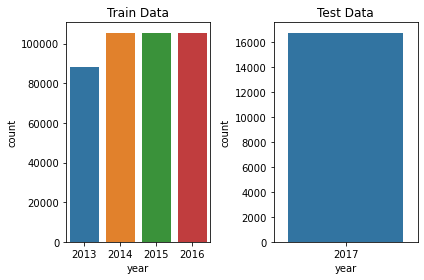

In [38]:
plt.figure(figsize = (15,8))
fig,(ax1,ax2)= plt.subplots(1,2)
sb.countplot(df_train['year'],ax=ax1)
plt.sca(ax1)
plt.title("Train Data")

sb.countplot(df_test['year'],ax=ax2)
plt.sca(ax2)
plt.title("Test Data")

fig.tight_layout()

#### Data from year 2014,2015,2016 are equally present in training dataset whereas number of rows from year 2013 is comparitively low in number.

##  Monthwise distribution:

<Figure size 1080x576 with 0 Axes>

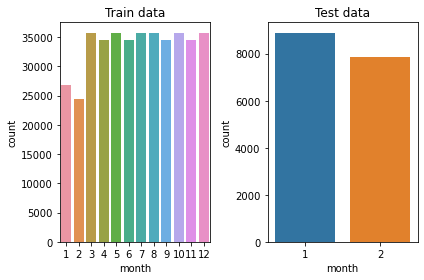

In [36]:
plt.figure(figsize = (15,8))
fig,(ax1,ax2)= plt.subplots(1,2)
sb.countplot(df_train['month'],ax=ax1)
plt.sca(ax1)
plt.title("Train data")

sb.countplot(df_test['month'],ax=ax2)
plt.sca(ax2)
plt.title("Test data")
fig.tight_layout()


<Figure size 1080x576 with 0 Axes>

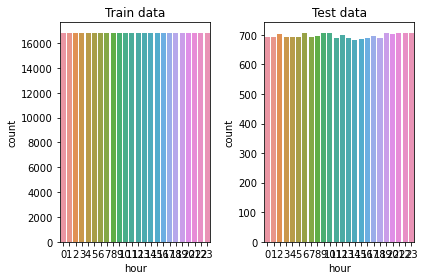

In [46]:
plt.figure(figsize = (15,8))
fig,(ax1,ax2)= plt.subplots(1,2)
sb.countplot(df_train['hour'],ax=ax1)
plt.sca(ax1)
plt.title("Train data")

sb.countplot(df_test['hour'],ax=ax2)
plt.sca(ax2)
plt.title("Test data")

fig.tight_layout()

<Figure size 1080x576 with 0 Axes>

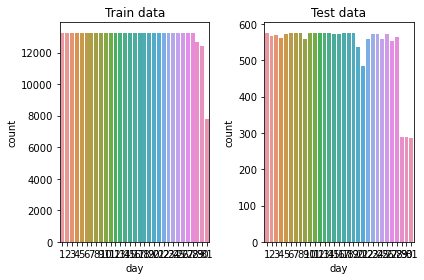

In [48]:
plt.figure(figsize = (15,8))
fig,(ax1,ax2)= plt.subplots(1,2)
sb.countplot(df_train['day'],ax=ax1)
plt.sca(ax1)
plt.title("Train data")


sb.countplot(df_test['day'],ax=ax2)
plt.sca(ax2)
plt.title("Test data")
fig.tight_layout()


<Figure size 1080x576 with 0 Axes>

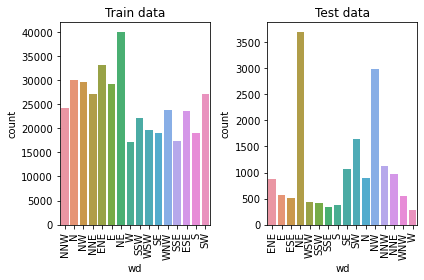

In [51]:
plt.figure(figsize = (15,8))
fig,(ax1,ax2)= plt.subplots(1,2)
sb.countplot(df_train['wd'],ax=ax1)
plt.sca(ax1)
plt.title("Train data")
plt.xticks(rotation = 90)


sb.countplot(df_test['wd'],ax=ax2)
plt.sca(ax2)
plt.title("Test data")
plt.xticks(rotation = 90)
fig.tight_layout()

#### Data from 16 directions are present in this dataset.
#### Train dataset: Data from East (wind direction) is highest.
#### Test dataset: Data from North-East (wind direction) is highest.

### Station wise analysis:

In [80]:
df_train['station'].value_counts()

Dongsi           33648
Huairou          33648
Aotizhongxin     33648
Gucheng          33648
Shunyi           33648
Guanyuan         33648
Wanshouxigong    33648
Dingling         33648
Wanliu           33648
Changping        33648
Tiantan          33648
Nongzhanguan     33648
Name: station, dtype: int64

<Figure size 1080x576 with 0 Axes>

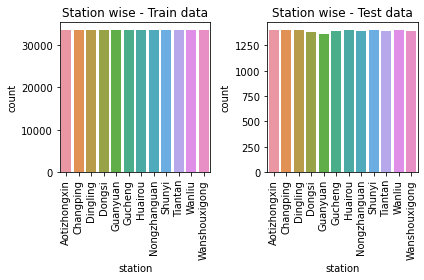

In [40]:
plt.figure(figsize = (15,8))
fig,(ax1,ax2)= plt.subplots(1,2)
sb.countplot(df_train['station'],ax=ax1)
plt.sca(ax1)
plt.xticks(rotation = 90)
plt.title('Station wise - Train data')


sb.countplot(df_test['station'],ax=ax2)
plt.sca(ax2)
plt.xticks(rotation = 90)
plt.title('Station wise - Test data')
fig.tight_layout()


#### Data from 12 stations are present  in this data set. It can be noted that data is distributed equally in both train and test datasets.

#### THE TRAIN DATASET CAN BE INFERRED TO BE A BALANCED DATASET BASED ON THE ABOVE GRAPHS ON YEAR,MONTH and STATION.

### UNIVARIATE ANALYSIS - CONTINUOUS VARIABLES - PM2.5,PM10,DEWP,RAIN,CO,SO2,NO2,O3,TEMP,PRESSURE

Skew of PM2.5 :  1.974286544195726


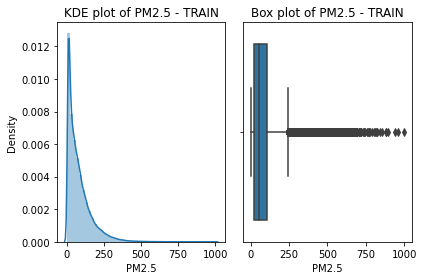

In [59]:
fig,(ax1,ax2) = plt.subplots(1,2)
sb.distplot(df_train['PM2.5'],ax=ax1)
plt.sca(ax1)
plt.title("KDE plot of PM2.5 - TRAIN")

sb.boxplot(df_train['PM2.5'],ax=ax2)
plt.sca(ax2)
plt.title("Box plot of PM2.5 - TRAIN")

fig.tight_layout()
print("Skew of PM2.5 : ",df_train['PM2.5'].skew())

#### The target variable in the train dataset is positively skewed with a value of 1.97. PM2.5 has has outliers in train dataset.

Skew of PM10 :  1.8164816324615514


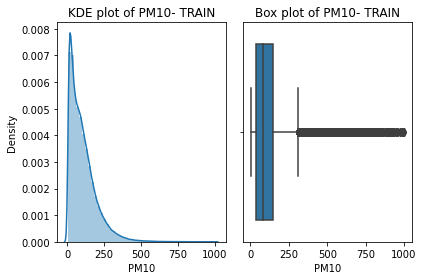

In [66]:
fig,(ax1,ax2) = plt.subplots(1,2)
sb.distplot(df_train['PM10'],ax=ax1)
plt.sca(ax1)
plt.title("KDE plot of PM10- TRAIN")

sb.boxplot(df_train['PM10'],ax=ax2)
plt.sca(ax2)
plt.title("Box plot of PM10- TRAIN")

fig.tight_layout()
print("Skew of PM10 : ",df_train['PM10'].skew())

In [67]:
#### PM10 in the train dataset is positively skewed with a value of 1.81. PM10 also has outliers in train dataset.

Skew of PM10 :  2.253403528865278


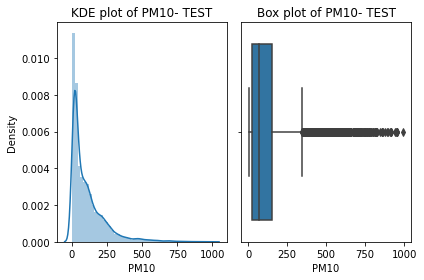

In [68]:
fig,(ax1,ax2) = plt.subplots(1,2)
sb.distplot(df_test['PM10'],ax=ax1)
plt.sca(ax1)
plt.title("KDE plot of PM10- TEST")

sb.boxplot(df_test['PM10'],ax=ax2)
plt.sca(ax2)
plt.title("Box plot of PM10- TEST")

fig.tight_layout()
print("Skew of PM10 : ",df_test['PM10'].skew())

#### PM10 in the train dataset is positively skewed with a value of 2.25. PM10 also has outliers in train dataset.

Skew of CO :  2.560661809644105


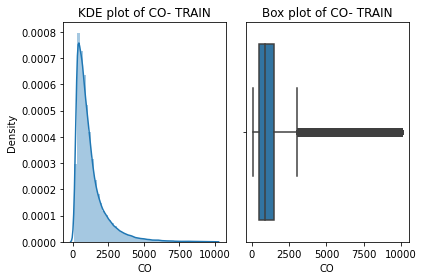

In [70]:
fig,(ax1,ax2) = plt.subplots(1,2)
sb.distplot(df_train['CO'],ax=ax1)
plt.sca(ax1)
plt.title("KDE plot of CO- TRAIN")

sb.boxplot(df_train['CO'],ax=ax2)
plt.sca(ax2)
plt.title("Box plot of CO- TRAIN")

fig.tight_layout()
print("Skew of CO : ",df_train['CO'].skew())

#### CO is very highly positively skewed with a value of 2.56 and can be seen with outliers in the boxplot

Skew of SO2 :  3.00773708737009


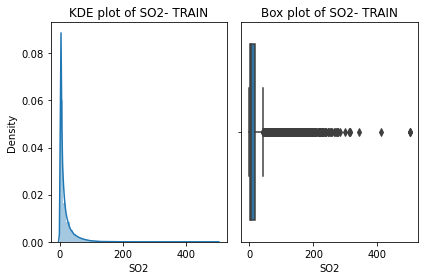

In [71]:
fig,(ax1,ax2) = plt.subplots(1,2)
sb.distplot(df_train['SO2'],ax=ax1)
plt.sca(ax1)
plt.title("KDE plot of SO2- TRAIN")

sb.boxplot(df_train['SO2'],ax=ax2)
plt.sca(ax2)
plt.title("Box plot of SO2- TRAIN")

fig.tight_layout()
print("Skew of SO2 : ",df_train['SO2'].skew())

#### SO2 is very highly positively skewed with a value of 3 and can be seen with outliers in the boxplot

Skew of NO2 :  1.052701359257078


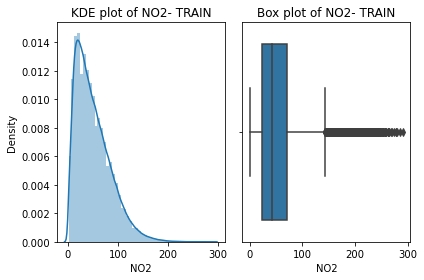

In [72]:
fig,(ax1,ax2) = plt.subplots(1,2)
sb.distplot(df_train['NO2'],ax=ax1)
plt.sca(ax1)
plt.title("KDE plot of NO2- TRAIN")

sb.boxplot(df_train['NO2'],ax=ax2)
plt.sca(ax2)
plt.title("Box plot of NO2- TRAIN")

fig.tight_layout()
print("Skew of NO2 : ",df_train['NO2'].skew())

#### NO2 is positively skewed with a value of 1.05 and can be seen with outliers in the boxplot


Skew of O3 :  1.6351636825697775


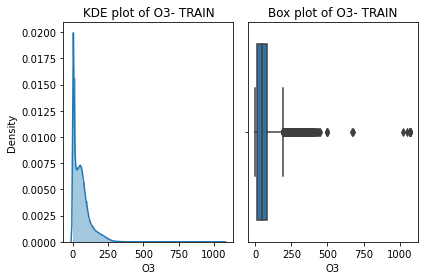

In [73]:
fig,(ax1,ax2) = plt.subplots(1,2)
sb.distplot(df_train['O3'],ax=ax1)
plt.sca(ax1)
plt.title("KDE plot of O3- TRAIN")

sb.boxplot(df_train['O3'],ax=ax2)
plt.sca(ax2)
plt.title("Box plot of O3- TRAIN")

fig.tight_layout()
print("Skew of O3 : ",df_train['O3'].skew())

#### O3 is positively skewed with a value of 1.63 and can be seen with outliers in the boxplot

Skew of RAIN :  29.440244798248553


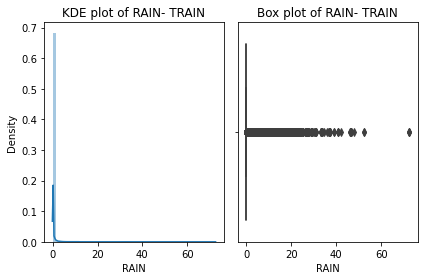

In [75]:
fig,(ax1,ax2) = plt.subplots(1,2)
sb.distplot(df_train['RAIN'],ax=ax1)
plt.sca(ax1)
plt.title("KDE plot of RAIN- TRAIN")

sb.boxplot(df_train['RAIN'],ax=ax2)
plt.sca(ax2)
plt.title("Box plot of RAIN- TRAIN")

fig.tight_layout()
print("Skew of RAIN : ",df_train['RAIN'].skew())

#### Column - Rain in the training dataset: can be seen to have very less variation in values though with outliers.
This column is very severely positively skewed with a value of 29.44 which is highest amongst all the columns in this dataset.

Skew of TEMP :  -0.16869783593805726


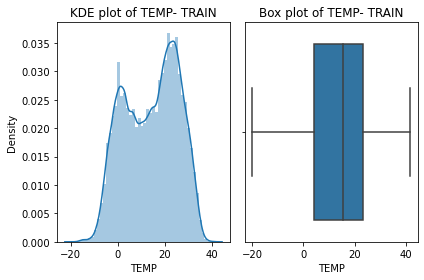

In [85]:
fig,(ax1,ax2) = plt.subplots(1,2)
sb.distplot(df_train['TEMP'],ax=ax1)
plt.sca(ax1)
plt.title("KDE plot of TEMP- TRAIN")

sb.boxplot(df_train['TEMP'],ax=ax2)
plt.sca(ax2)
plt.title("Box plot of TEMP- TRAIN")

fig.tight_layout()
print("Skew of TEMP : ",df_train['TEMP'].skew())

#### TEMPERATURE: fairly normal distribution  with a skew of -0.16 with no outliers.Values in this column ranges from -20 to +40

Skew of WSPM :  1.6252700412920047


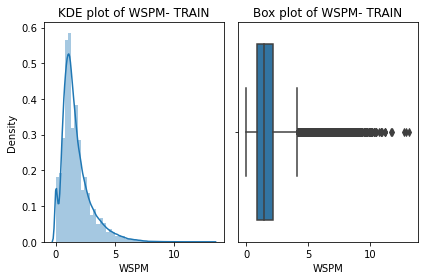

In [86]:
fig,(ax1,ax2) = plt.subplots(1,2)
sb.distplot(df_train['WSPM'],ax=ax1)
plt.sca(ax1)
plt.title("KDE plot of WSPM- TRAIN")

sb.boxplot(df_train['WSPM'],ax=ax2)
plt.sca(ax2)
plt.title("Box plot of WSPM- TRAIN")

fig.tight_layout()
print("Skew of WSPM : ",df_train['WSPM'].skew())

#### WSPM can be seen as a column with fairly positive skewness and with presence of outliers. The values range from 0-5 with outliers present beyond 5

Skew of DEWP :  -0.25002225569168773


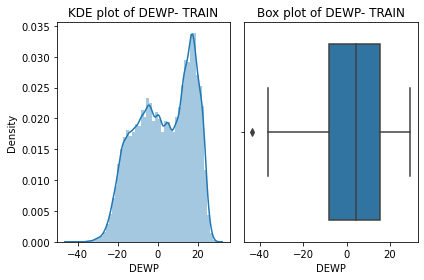

In [87]:
fig,(ax1,ax2) = plt.subplots(1,2)
sb.distplot(df_train['DEWP'],ax=ax1)
plt.sca(ax1)
plt.title("KDE plot of DEWP- TRAIN")

sb.boxplot(df_train['DEWP'],ax=ax2)
plt.sca(ax2)
plt.title("Box plot of DEWP- TRAIN")

fig.tight_layout()
print("Skew of DEWP : ",df_train['DEWP'].skew())

#### DEWPoint can be seen as a column with fairly normal distribution.Skewness = -0.25 and with presence of mild outliers. The values range from -40 to  25 with outliers present below -37.

Skew of PRES :  0.15194784481504825


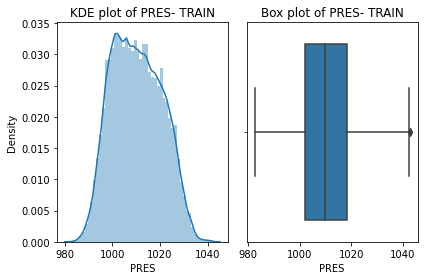

In [88]:
fig,(ax1,ax2) = plt.subplots(1,2)
sb.distplot(df_train['PRES'],ax=ax1)
plt.sca(ax1)
plt.title("KDE plot of PRES- TRAIN")

sb.boxplot(df_train['PRES'],ax=ax2)
plt.sca(ax2)
plt.title("Box plot of PRES- TRAIN")

fig.tight_layout()
print("Skew of PRES : ",df_train['PRES'].skew())

#### PRESSURE is a fairly normally distributed column with very mild presence of outliers beyond the maximum value of 1040.

### SUMMARY:
#### RAIN is very highly positively skewed.
#### SO2 AND CO are also positively skewed
#### PM2.5,PM10,NO2,O3,WSPM are moderately positively skewed.
#### TEMP and DEWPT are slightly negatively skewed.


## BIVARIATE ANALYSIS:

### Year wise pollutant analysis

## PM2.5 and PM10

Text(0.5, 1.0, 'YEAR WISE --  PM2.5 & PM10')

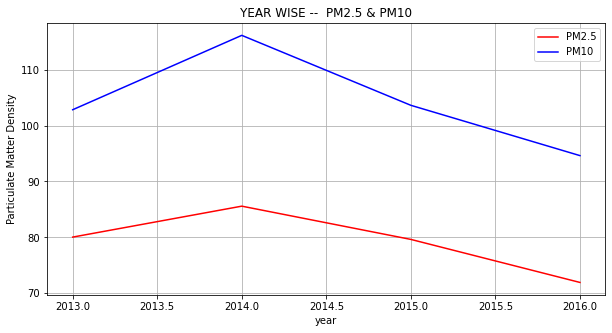

In [96]:
plt.figure(figsize = (10,5))
sb.lineplot(df_train['year'],df_train['PM2.5'],label = 'PM2.5',color = 'Red',markers = 'o')
sb.lineplot(df_train['year'],df_train['PM10'],label = 'PM10',color = 'Blue',markers = 'o')
plt.ylabel("Particulate Matter Density")
plt.grid()
plt.legend()
plt.title("YEAR WISE --  PM2.5 & PM10")

### We can see that both PM2.5 and PM10 both peak in the year 2014. Both PM2.5 and PM10 increase together from lowest in 2013 , peak at 2014 and then decrease co-ordinatedly to lowest in 2016.

Text(0.5, 1.0, 'Station WISE --  PM2.5 & PM10')

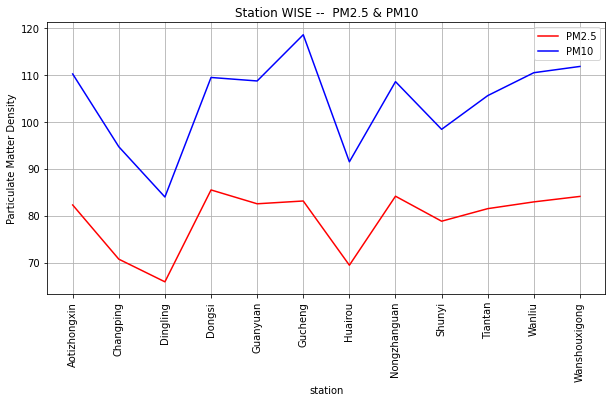

In [99]:
plt.figure(figsize = (10,5))
sb.lineplot(df_train['station'],df_train['PM2.5'],label = 'PM2.5',color = 'Red',markers = 'o')
sb.lineplot(df_train['station'],df_train['PM10'],label = 'PM10',color = 'Blue',markers = 'o')
plt.ylabel("Particulate Matter Density")
plt.grid()
plt.legend()
plt.xticks(rotation = 90)
plt.title("Station WISE --  PM2.5 & PM10")

An interesting trend can be observed in this graph. The correlation between PM2.5 and PM10 can be seen here.
Stations where PM10 is high, can be seen with high PM2.5 levels also!

Stations with comparitively high PM10&PM2.5 levels are Aotizhongxin,Dongsi,Gucheng,Nongzhanguan and Wanshouxigong.
Stations with comparitively lower PM10&PM2.5 levels are Changping,Dingling,Huairou,Shunyi.

Station with Highest PM10 - Gucheng

Station with Highest PM2.5 - Dongsi


Station with Lowest PM10 - Dingling

Station with Lowestest PM2.5 - Dingling

Text(0.5, 1.0, 'Month WISE --  PM2.5 & PM10')

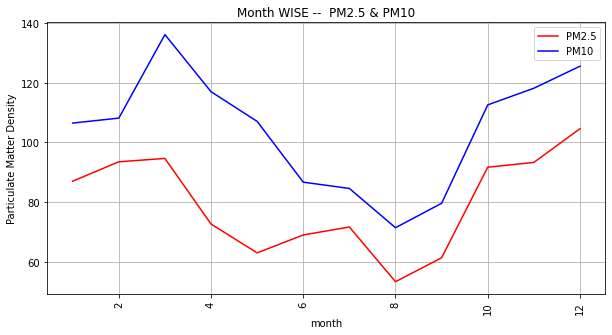

In [101]:
plt.figure(figsize = (10,5))
sb.lineplot(df_train['month'],df_train['PM2.5'],label = 'PM2.5',color = 'Red',markers = 'o')
sb.lineplot(df_train['month'],df_train['PM10'],label = 'PM10',color = 'Blue',markers = 'o')
plt.ylabel("Particulate Matter Density")
plt.grid()
plt.legend()
plt.xticks(rotation = 90)
plt.title("Month WISE --  PM2.5 & PM10")

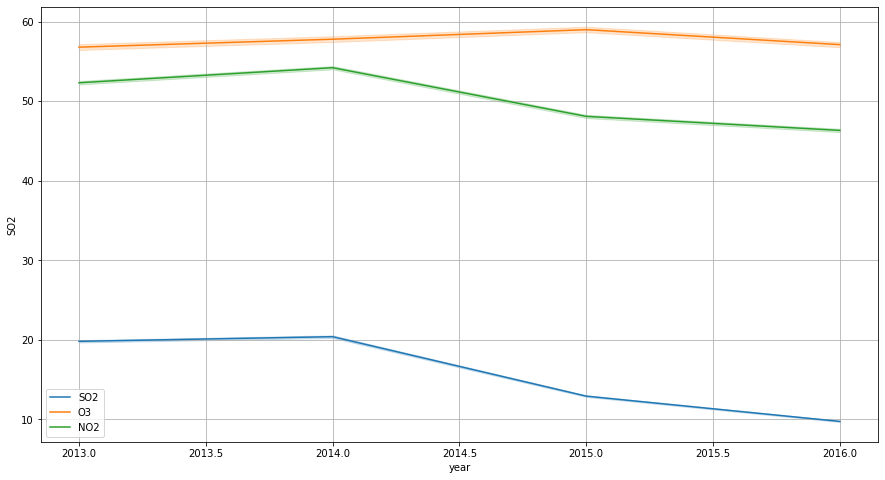

In [128]:
plt.figure(figsize = (15,8))
sb.lineplot(df_train['year'],df_train['SO2'],label = 'SO2')
sb.lineplot(df_train['year'],df_train['O3'],label = 'O3')
sb.lineplot(df_train['year'],df_train['NO2'],label = 'NO2')
plt.grid()
plt.legend()

### CO levels are much higher in magnitude than SO2,NO2 and O3 levels.
### While CO levels has seen a sharp increase from 2013 till 2014, the increase has been slower till 2015 and we see a steep  decline from 2015 till 2016.

### NO2 levels are 45-55 and are seen to decrase from 2015

### SO2 levels are 9-22 and are seen to decrase from 2015 

### NO2,SO2  are seen to peak at 2014 whereas CO has its peak at 2015

### variation in levels of O3  is very less though magnitude wise, its ranks second, next to CO.


In [78]:
#### CHECKING SKEW OF NUMERICAL COLUMNS: TRAIN DATASET

df_train_num = df_train.select_dtypes(np.number)
df_train_num.drop('REF_NO',axis=1,inplace=True)

Text(0.5, 1.0, 'Station wise CO level analysis')

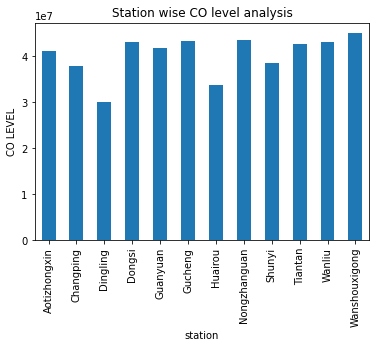

In [137]:
### CITY WISE POLLUTANT LEVELS:

df_train.groupby('station')['CO'].sum().plot(kind = 'bar')

plt.ylabel('CO LEVEL')
plt.title("Station wise CO level analysis")

Text(0.5, 1.0, 'Station wise NO2 level analysis')

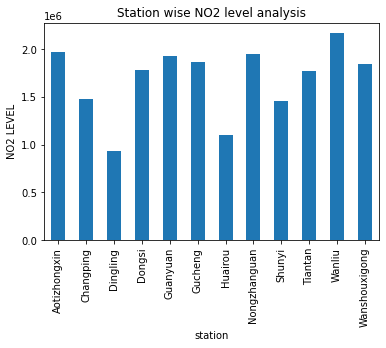

In [138]:
df_train.groupby('station')['NO2'].sum().plot(kind = 'bar')

plt.ylabel('NO2 LEVEL')
plt.title("Station wise NO2 level analysis")

Text(0.5, 1.0, 'Station wise SO2 level analysis')

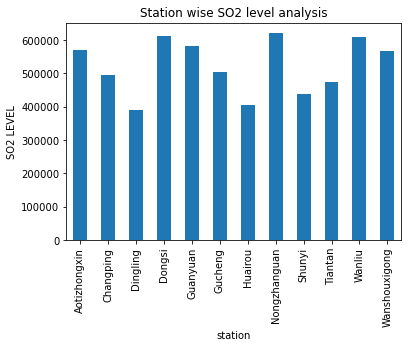

In [139]:
df_train.groupby('station')['SO2'].sum().plot(kind = 'bar')

plt.ylabel('SO2 LEVEL')
plt.title("Station wise SO2 level analysis")

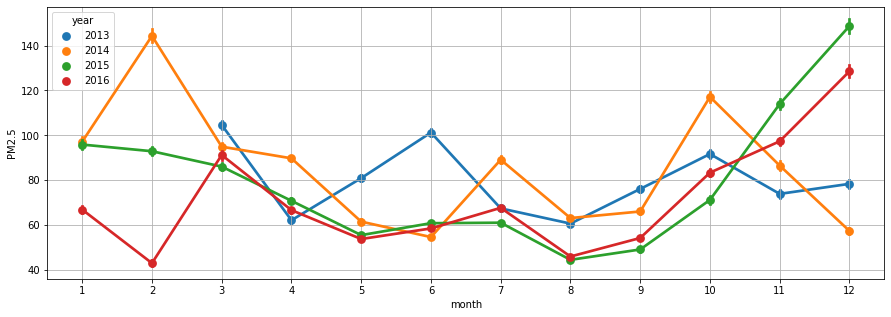

In [153]:
plt.figure(figsize = (15,5))
sb.pointplot(df_train['month'],df_train['PM2.5'],hue = df_train['year'])
plt.grid()


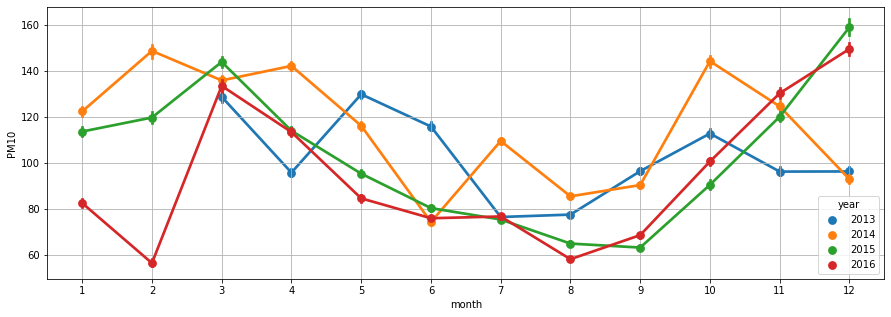

In [154]:
plt.figure(figsize = (15,5))
sb.pointplot(df_train['month'],df_train['PM10'],hue = df_train['year'])
plt.grid()

In [148]:
df_train.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
### TARGET VARIABLE:

<AxesSubplot:xlabel='SO2', ylabel='PM2.5'>

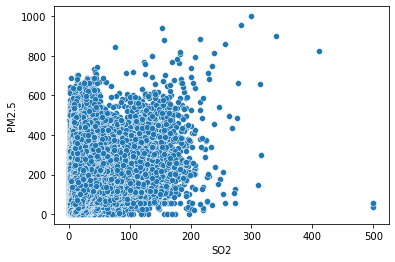

In [149]:
sb.scatterplot(df_train['SO2'],df_train['PM2.5'])

<AxesSubplot:xlabel='NO2', ylabel='PM2.5'>

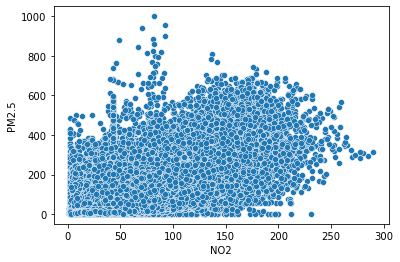

In [150]:
sb.scatterplot(df_train['NO2'],df_train['PM2.5'])

<AxesSubplot:xlabel='CO', ylabel='PM2.5'>

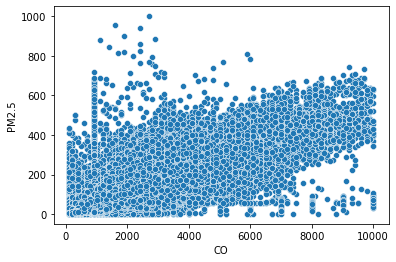

In [151]:
sb.scatterplot(df_train['CO'],df_train['PM2.5'])

<AxesSubplot:xlabel='PM2.5', ylabel='O3'>

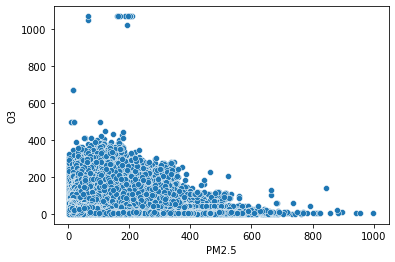

In [164]:
sb.scatterplot(df_train['PM2.5'],df_train['O3'])

In [355]:
df_train.corr()

,REF_NO,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
REF_NO,1.000000,-0.037910,-0.053632,-0.249465,-0.063163,0.008302,-0.029459,-0.046830,0.125858,-0.023617,0.010702,0.042526
PM2.5,-0.037910,1.000000,0.872622,0.477052,0.649126,0.765128,-0.137110,-0.129612,0.021479,0.114069,-0.014347,-0.263608
PM10,-0.053632,0.872622,1.000000,0.457414,0.637909,0.679981,-0.099300,-0.096467,-0.014110,0.064608,-0.027100,-0.173175
SO2,-0.249465,0.477052,0.457414,1.000000,0.493227,0.539765,-0.157674,-0.328618,0.229994,-0.276936,-0.040089,-0.099917
NO2,-0.063163,0.649126,0.637909,0.493227,1.000000,0.681253,-0.460717,-0.279716,0.177826,-0.038072,-0.043965,-0.389468
CO,0.008302,0.765128,0.679981,0.539765,0.681253,1.000000,-0.298988,-0.324891,0.189546,-0.062284,-0.012386,-0.286041
O3,-0.029459,-0.137110,-0.099300,-0.157674,-0.460717,-0.298988,1.000000,0.591614,-0.442990,0.310669,0.022587,0.292975
TEMP,-0.046830,-0.129612,-0.096467,-0.328618,-0.279716,-0.324891,0.591614,1.000000,-0.807528,0.814974,0.035167,0.041764
PRES,0.125858,0.021479,-0.014110,0.229994,0.177826,0.189546,-0.442990,-0.807528,1.000000,-0.741549,-0.059485,0.059558
DEWP,-0.023617,0.114069,0.064608,-0.276936,-0.038072,-0.062284,0.310669,0.814974,-0.741549,1.000000,0.085378,-0.294380


<AxesSubplot:>

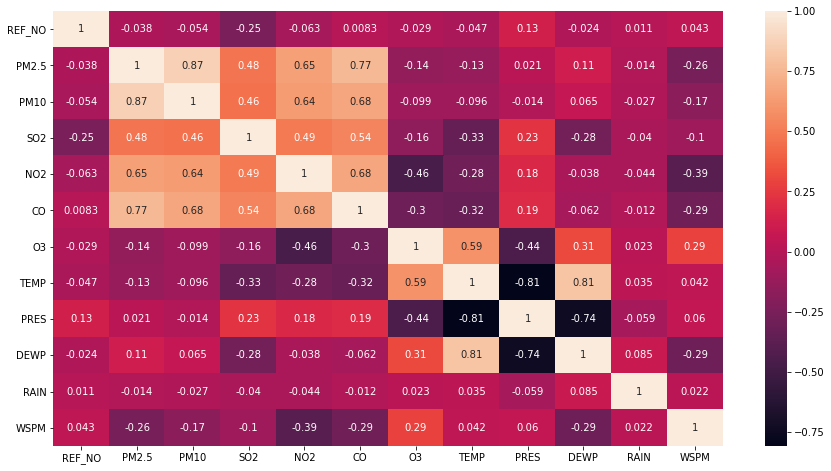

In [356]:
plt.figure(figsize = (15,8))

sb.heatmap(df_train.corr(),annot=True)

<AxesSubplot:xlabel='PM10', ylabel='PM2.5'>

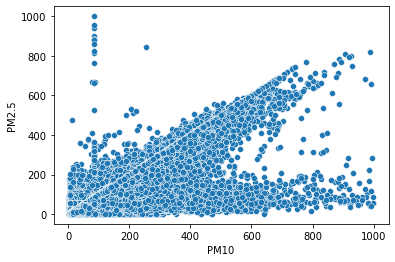

In [357]:
sb.scatterplot(df_train['PM10'],df_train['PM2.5'])

<AxesSubplot:xlabel='TEMP', ylabel='PM10'>

<Figure size 1080x576 with 0 Axes>

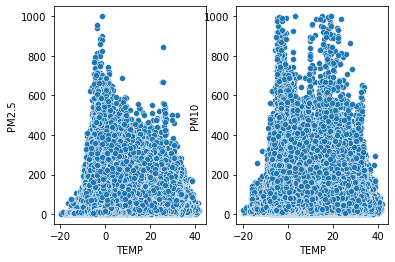

In [160]:
plt.figure(figsize = (15,8))
fig,(ax1,ax2) = plt.subplots(1,2)


sb.scatterplot(df_train['TEMP'],df_train['PM2.5'],ax= ax1)
sb.scatterplot(df_train['TEMP'],df_train['PM10'],ax = ax2)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'REF_NO'),
  Text(2, 0, 'PM2.5'),
  Text(3, 0, 'PM10'),
  Text(4, 0, 'SO2'),
  Text(5, 0, 'NO2'),
  Text(6, 0, 'CO'),
  Text(7, 0, 'O3'),
  Text(8, 0, 'TEMP'),
  Text(9, 0, 'PRES'),
  Text(10, 0, 'DEWP'),
  Text(11, 0, 'RAIN'),
  Text(12, 0, 'WSPM')])

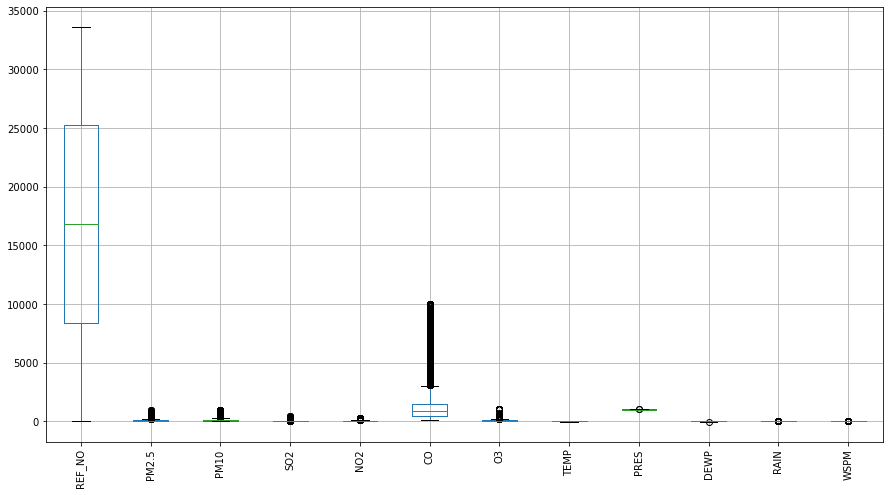

In [358]:
#### OUTLIERS CHECK:
plt.figure(figsize = (15,8))
df_train_num.boxplot()
plt.xticks(rotation=90)

In [360]:
q1 = df_train.quantile(0.25)

q3 = df_train.quantile(0.75)

iqr = q3-q1

upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)

df1 = df_train[((df_train > upper) | (df_train < lower)).any(axis=1)]

print("No of rows in outliers: ",df1.shape[0])

No of rows in outliers:  110056


In [361]:
#There are 1,08,366 rows belinging to outlier category.
#So we remove the outliers.
df_train = df_train[~((df_train > upper) | (df_train < lower)).any(axis=1)]
df_train.shape

(293720, 18)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, 'REF_NO'),
  Text(2, 0, 'PM10'),
  Text(3, 0, 'SO2'),
  Text(4, 0, 'NO2'),
  Text(5, 0, 'CO'),
  Text(6, 0, 'O3'),
  Text(7, 0, 'TEMP'),
  Text(8, 0, 'PRES'),
  Text(9, 0, 'DEWP'),
  Text(10, 0, 'RAIN'),
  Text(11, 0, 'WSPM')])

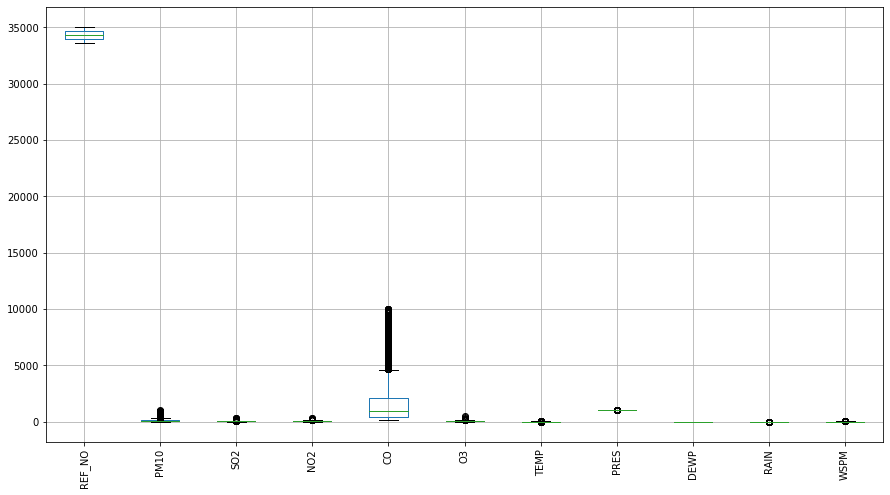

In [362]:
#### OUTLIERS IN TEST DATASET:

plt.figure(figsize = (15,8))
df_test.boxplot()
plt.xticks(rotation=90)

In [406]:
#Checking no. of rows in outliers category:

q1 = df_test.quantile(0.25)

q3 = df_test.quantile(0.75)

iqr = q3-q1

upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)

df1 = df_test[((df_test > upper) | (df_test < lower)).any(axis=1)]


print("No of rows in outliers: ",df1.shape[0])

No of rows in outliers:  1118


In [407]:
#There are 3601 rows belonging to outlier category.So we remove the outliers.

df_test = df_test[~((df_test > upper) | (df_test < lower)).any(axis=1)]
df_test.shape

(12009, 17)

#### STRONG MULTICOLLINEARITY persists!



<AxesSubplot:>

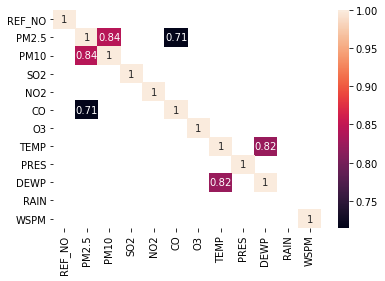

In [796]:
sb.heatmap(df_train.corr()[df_train.corr()>0.7],annot=True)

<AxesSubplot:>

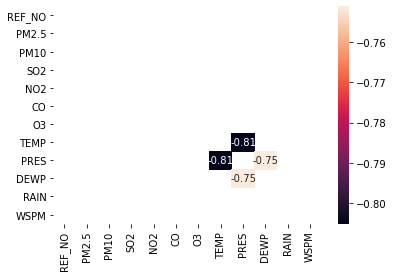

In [451]:
sb.heatmap(df_train.corr()[df_train.corr() < - 0.7],annot=True)